# The Battle of Neighborhoods

### Angeletti Giovanni M.

## Report Content

#### 1. Introduction section: 
 Discussion of the business problem and the interested audience in this project.
#### 2. Data Section:
 Description of the data that will be used to solve the problem and the sources.
#### 3. Methodology section: 
 Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
#### 4. Results section:
 Discussion of the results.
#### 5. Discussion section:
 Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
#### 6. Conclusion section:
 Report Conclusion.

In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip3 install folium
import folium # map rendering library

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 7.5 MB/s  eta 0:00:01
Libraries imported.


# 1. Introduction section

#### Discussion of the problem and background

#### Scenario:

I am a data scientist residing in Toronto. A business company in Manhattan, NY hire me for data analysis to open a restaurant. Both NY and Toronto cities are very different and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. In order to make a comparison and evaluation of the rental options in Manhattan NY, I must set some basis, therefore the property in Manhattan must meet the following demands:

- desired location is in the Manhattan area, New York,
- should be near to the metro stations,
- price of rent not exceed $7,000 per month,
- desirable to have venues such as coffee shops, restaurants Asian Thai, wine stores, gym, food shops and so on.

#### Business problem:

The challenge is if someone is looking to open a restaurant in Manhattan area, where would you recommend to open it? Similarly, if a contractor is trying to start their own business, where would you recommend to setup their office?

# 2. Data section:

#### Description of the Data:

The following data is required to answer the issues of the problem:
- List of boroughs and neighborhoods of Manhattan with their geodata (latitud and longitud)
- List of properties for rent in Manhattan area with their addresses and price
- Venues for each Manhattan neighborhood (than can be clustered)

#### How the data will be used to solve the problem?

The data will be used as follows:

- Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB)
- Use foursquare and geopy data to map and identify the venues and ammenities near each metro station
- Use Foursquare and geopy data to map the location of rental places
- Create a map, the average rental price per square ft
- Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.

The processing of these DATA will allow to answer the key questions to make a decision:

- What is the cost of rent (per square ft)?
- What is the area of Manhattan with best rental pricing that meets criteria established?
- What are the venues of the two best places to open a restaurent? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?

# 3. Methodology section

#### The analysis and the strategy

The strategy is based on mapping the above described data, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Toronto. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

- What is the cost of available rental places that meet the demands?
- What is the cost of rent around a mile radius from each subway metro station?
- What is the area of Manhattan with best rental pricing that meets criteria established?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

# Methodology execution - Mapping Data

### Reference of venues around current residence in Toronto for comparison to Manhattan place

In [3]:
neighborhood_latitude = 43.6532
neighborhood_longitude= -79.3832
# create neighbourhood map of TORONTO using latitude and longitude values above

In [4]:
CLIENT_ID = 'OAP1CAJDSKUMHJYAIQZ1O1IHNOWXJIDGUNGTDUOVH4RZJEEP' #Foursquare ID
CLIENT_SECRET = 'JWOJCOH1WLZFHLQHVAHNDJLOKCZ2DJYPJ2CEUWC10MVSV0YS' #Foursquare Secret
ACCESS_TOKEN = 'PDSFZNFEOR4PMXKCYP2U3NRKW2UFUWGRMMCA5ZEYWRYWROX2' #FourSquare Access Token
VERSION = '20180604'

In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OAP1CAJDSKUMHJYAIQZ1O1IHNOWXJIDGUNGTDUOVH4RZJEEP&client_secret=JWOJCOH1WLZFHLQHVAHNDJLOKCZ2DJYPJ2CEUWC10MVSV0YS&v=20180604&ll=43.6532,-79.3832&radius=500&limit=100'

In [6]:
results = requests.get(url).json()
#results

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
    
Toronto_nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Toronto_nearby_venues =Toronto_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
Toronto_nearby_venues['venue.categories'] = Toronto_nearby_venues.apply(get_category_type, axis=1)

# clean columns
Toronto_nearby_venues.columns = [col.split(".")[-1] for col in Toronto_nearby_venues.columns]

Toronto_nearby_venues.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Indigo,Bookstore,43.653515,-79.380696
4,Old City Hall,Monument / Landmark,43.652009,-79.381744
5,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952
6,M Square Coffee Co,Coffee Shop,43.651218,-79.383555
7,Crepe Delicious,Fast Food Restaurant,43.654536,-79.380889
8,Poke Guys,Poke Place,43.654895,-79.385052
9,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684


### Map of Toronto with venues near CBD place - for reference

In [24]:
latitude = 43.6532
longitude= -79.3832
# create map of TORONTO using latitude and longitude values above:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(Toronto_nearby_venues['lat'], Toronto_nearby_venues['lng'], Toronto_nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_toronto)  
    
map_toronto

# Manhattan Neighborhoods - Data and Mapping

I used the csv file with cluster neighborhood data that was produced with Foursquare during course lab work.

In [12]:
manhattan_data = pd.read_csv('https://raw.githubusercontent.com/GiovanniAngeletti/Coursera_Capstone/main/manhattan_neighborhoods_data.csv')
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [13]:
manhattan_merged  = pd.read_csv('https://raw.githubusercontent.com/GiovanniAngeletti/Coursera_Capstone/main/manhattan_merged.csv') 
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


In [14]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=20,
        radius=20,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_clusters)  
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=5,
        radius=5,
        popup=label,
        color='red',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_clusters)        
map_clusters

# Manhattan Rental Sample Data (web scrapped)

In [15]:
mh_rent=pd.read_csv('https://raw.githubusercontent.com/GiovanniAngeletti/Coursera_Capstone/main/manhattan_rent.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


# Manhattan rent price statistics

### Rental price mean value is $7000 per month

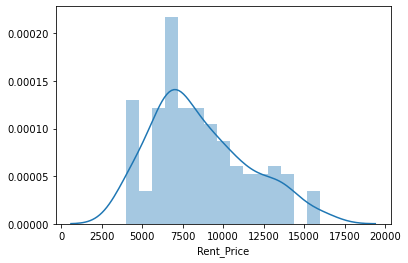

In [16]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

### Price per feet statistics

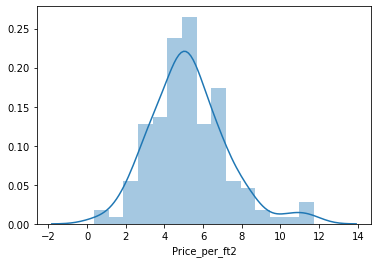

In [17]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

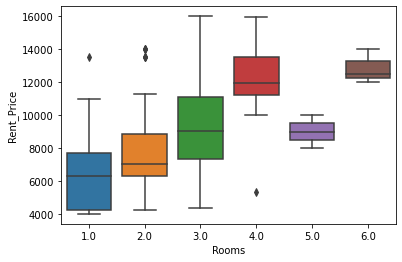

In [18]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

# Map based on rental data

In [25]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

# Merged map of Cluster of venues and Rental

In [20]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]

for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

In [21]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


# Manhattan Subway list with geo data

In [22]:
# A csv file summarized the subway station and the addresses for next step to determine geodata
mh=pd.read_csv('https://raw.githubusercontent.com/philipshield99/Cousera_Capstone5/master/MH_subway.csv')
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

# 4. Results

### All maps are consolidated into one for decision making

In [23]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

map_mh_one

# Property selection:

Using the map above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

- Cluster 2 Sutton Place is the best choice for the rental for the requirements and budget

- 305 East 63rd Street rental cost is US7500 slightly above the US7000 budget but located 400 meters from "59 St-Lexington Av subway station" and very near to cluster 2, Sutton Place.

- 150 East 57th Street rent cost is USD5950, under the US7000 budget. The same distance from "59 St-Lexington Av Subway Station" but it is a bit more far from cluster 2, Sutton Place.

- Based on all information 305 East 63rd Street is the best choice as proximity to Cluster 2 will make more traffic to the shop

# 5. Discussion

I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned. I have created a good project that I can present as an example to show my potential. I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases. Thanks for this lab!

# 6. Conclusion

I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation. This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools. The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.